In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np


In [2]:
df=pd.read_csv('data/columnas_final.csv')

#### Vamos a realizar un EDA sobre los datos de nuestro nuevo DataFrame que contiene solo las columnas seleciconadas para el analisis.

Redefinimos las preguntas 

Preguntas nuevas:

- ¿Cual es el ratio de hombres y mujeres segun el perfil?
- ¿Cual es perfil educativo para cada puesto?
- Herramientas mas utilizadas segun los perfiles. 
- ¿Cuál es la diferencia de salarios entre hombres y mujeres segun el perfil?
- Perfil segun pais que herramientas usan, en coparativa con España.


Extras:
- ¿Cómo se distribuye este porcentaje segun los paises?


Conteo de las filas que estan ducplicadas 

In [3]:
df.duplicated().sum()

0

Calculamos el porcentaje de nulos que tenemos en cada una de nuestras columnas

In [18]:
df.isnull().sum()*100/df.shape[0]

level_0                   0.000000
index                     0.000000
time                      0.000000
age                       0.000000
gender                    0.000000
pais                      0.000000
formacion                 0.000000
puesto                    0.000000
experiencia_prog          0.000000
lenguaje_top              3.977207
exp_ml                    8.543487
tamaño_empresa           37.431179
uso_ml                   38.582374
salario                  40.742309
inversion_ml             41.543141
ppal_herramienta_data    28.814538
lenguaje_prog             3.973357
plataforma                4.000308
plat_cursos              30.189042
nubes                    64.671005
plataforma_top           87.960574
dtype: float64

In [17]:
df.head()

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,...,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top
0,0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,...,50-249 employees,No (we do not use ML methods),"25,000-29,999",$100-$999,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"edX,Kaggle Learn Courses,DataCamp,Udacity,Udemy","GitHub , Kaggle",NaN
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,...,"1000-9,999 employees",We are exploring ML methods (and may one day p...,"60,000-69,999",$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook","Kaggle Learn Courses,Cloud-certification progr...",NaN,NaN
2,2,2,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,...,"1000-9,999 employees",I do not know,$0-999,$0 ($USD),"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",DataCamp,I do not share my work publicly,NaN
3,3,3,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,...,"1000-9,999 employees",I do not know,"30,000-39,999",$0 ($USD),"Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",edX,NaN,NaN
4,4,4,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,...,50-249 employees,We use ML methods for generating insights (but...,"30,000-39,999","$1000-$9,999","Local development environments (RStudio, Jupyt...","Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook","Kaggle Learn Courses,Udemy",I do not share my work publicly,NaN


In [4]:
df.tail()

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,...,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top
25968,25968,25968,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,...,"10,000 or more employees",We are exploring ML methods (and may one day p...,"15,000-19,999","$1000-$9,999","Business intelligence software (Salesforce, Ta...","Python, SQL, Javascript, Bash","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Kaggle Learn Courses,DataCamp,Udacity,Udemy,Li...","GitHub , Colab",Amazon Web Services (AWS)
25969,25969,25969,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python,...,NaN,NaN,NaN,NaN,NaN,Python,PyCharm,NaN,NaN,NaN
25970,25970,25970,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,...,"1000-9,999 employees",I do not know,$0-999,$1-$99,"Basic statistical software (Microsoft Excel, G...",NaN,NaN,LinkedIn Learning,NaN,NaN
25971,25971,25971,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,...,"10,000 or more employees","We have well established ML methods (i.e., mod...",NaN,NaN,NaN,"Python, SQL","Notepad++,Jupyter Notebook",NaN,NaN,NaN
25972,25972,25972,255,18-21,Man,India,Bachelor’s degree,Business Analyst,I have never written code,NaN,...,0-49 employees,I do not know,$0-999,$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)",NaN,NaN,None,NaN,NaN


In [19]:
df.dtypes

level_0                   int64
index                     int64
time                      int64
age                      object
gender                   object
pais                     object
formacion                object
puesto                   object
experiencia_prog         object
lenguaje_top             object
exp_ml                   object
tamaño_empresa           object
uso_ml                   object
salario                  object
inversion_ml             object
ppal_herramienta_data    object
lenguaje_prog            object
plataforma               object
plat_cursos              object
nubes                    object
plataforma_top           object
dtype: object

In [6]:
df.shape

(25973, 21)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 0 to 25972
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   level_0                25973 non-null  int64 
 1   index                  25973 non-null  int64 
 2   time                   25973 non-null  int64 
 3   age                    25973 non-null  object
 4   gender                 25973 non-null  object
 5   pais                   25973 non-null  object
 6   formacion              25973 non-null  object
 7   puesto                 25973 non-null  object
 8   experiencia_prog       25973 non-null  object
 9   lenguaje_top           24940 non-null  object
 10  exp_ml                 23754 non-null  object
 11  tamaño_empresa         16251 non-null  object
 12  uso_ml                 15952 non-null  object
 13  salario                15391 non-null  object
 14  inversion_ml           15183 non-null  object
 15  ppal_herramienta_da

In [7]:
df['puesto'].value_counts()

Student                         6804
Data Scientist                  3616
Software Engineer               2449
Other                           2393
Data Analyst                    2301
Currently not employed          1986
Research Scientist              1538
Machine Learning Engineer       1499
Business Analyst                 968
Program/Project Manager          849
Data Engineer                    668
Product Manager                  319
Statistician                     313
DBA/Database Engineer            171
Developer Relations/Advocacy      99
Name: puesto, dtype: int64

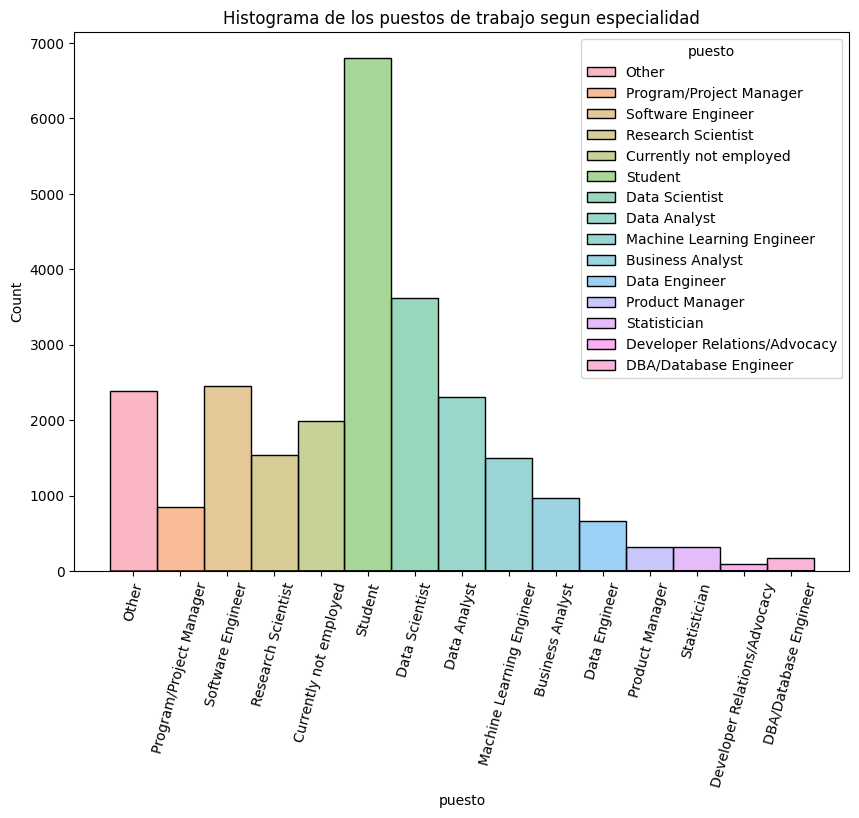

In [16]:
plt.figure(figsize =(10,7))

# seleccionamos el histplot y le añadimos el parámetro kde que nos va a mostrar una línea de tendencia 
fig = sns.histplot(x=df['puesto'], data = df, hue = 'puesto', kde=True)

fig.set_title('Histograma de los puestos de trabajo segun especialidad')

plt.xticks(rotation= 75)

# mostramos la gráfica
plt.show()

SPRINT 3

-   Limpieza de nulos
-   Categorizaciones
-   Cambiar tipo de dato (columna)  
-   Columna salarios modificar el tipo de dato y crear rango
-   Diseño de gráfica (Visualizacion), storytelling de los datos.